In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

mnist = datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = Sequential([
  Flatten(input_shape=(28,28)),
  Dense(32, activation='relu'),
  Dense(16, activation='relu'),
  Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

callback_EarlyStopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
callback_ModelCheckpoint = ModelCheckpoint(filepath='./ModelCheckpoint', monitor='val_loss', save_weights_only=True, save_best_only=True, verbose=1)

history = model.fit(x_train, y_train,
                    validation_split=0.2,
                    epochs=20, 
                    batch_size=32,
                    callbacks=[callback_EarlyStopping, callback_ModelCheckpoint])

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/20
1477/1500 [============================>.] - ETA: 0s - loss: 0.4242 - accuracy: 0.8749
Epoch 1: val_loss improved from inf to 0.23531, saving model to ./ModelCheckpoint
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4218 - accuracy: 0.8757 - val_loss: 0.2353 - val_accuracy: 0.9337
Epoch 2/20
1489/1500 [============================>.] - ETA: 0s - loss: 0.2074 - accuracy: 0.9397
Epoch 2: val_loss improved from 0.23531 to 0.18457, saving model to ./ModelCheckpoint
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2080 - accuracy: 0.9395 - val_loss: 0.1846 - val_accuracy: 0.9465
Epoch 3/20
1491/1500 [============================>.] - ETA: 0s - loss: 0.1677 - accuracy: 0.9505
Epoch 3: val_loss improved from 0.18457 to 0.15802, saving model to ./ModelCheckpoint
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1679 - accuracy: 0.9505 - val_loss: 0.1580 - val_accur

## 3.6 모델 평가

In [2]:
loss, accuracy = model.evaluate(x_test, y_test)

print('\nTest accuracy:', accuracy)
print('Test loss:', loss)

313/313 [==============================] - 1s 2ms/step - loss: 0.1195 - accuracy: 0.9649

Test accuracy: 0.964900016784668
Test loss: 0.11954454332590103


In [3]:
import tensorflow as tf

test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_ds = test_ds.batch(32)

result = model.evaluate(test_ds)

print('\nTest accuracy:', accuracy)
print('Test loss:', loss)

313/313 [==============================] - 1s 2ms/step - loss: 0.1195 - accuracy: 0.9649

Test accuracy: 0.964900016784668
Test loss: 0.11954454332590103


## 3.7 모델 예측

In [4]:
predictions = model.predict(x_test)

print(predictions[0])
print(predictions[1])

313/313 [==============================] - 1s 2ms/step
[4.8865811e-10 9.5908021e-08 1.0957033e-05 3.1959745e-03 1.0888924e-11
 3.8881058e-06 1.5568920e-15 9.9678528e-01 2.8405680e-06 9.4938719e-07]
[5.2839794e-10 7.2533990e-06 9.9999267e-01 1.8573385e-08 1.9210893e-17
 7.7113488e-10 1.9063724e-09 3.2748403e-13 3.9680735e-08 2.1577974e-17]


In [5]:
import numpy as np

print(np.argmax(predictions[0]))
print(np.argmax(predictions[1]))

7
2


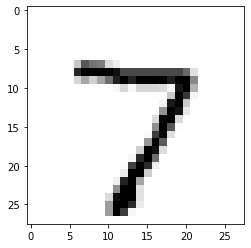

In [6]:
import matplotlib.pyplot as plt

plt.imshow(x_test[0], cmap='Greys')
plt.show()

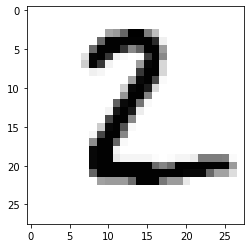

In [7]:
import matplotlib.pyplot as plt

plt.imshow(x_test[1], cmap='Greys')
plt.show()